In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Add more libraries as needed for your specific task.

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create datasets for categorical and numerical variables
df_categorical = df[categorical_features]
df_numerical = df[numerical_features]

# Print some information about the new datasets
print("Categorical Dataset:")
print(df_categorical.info())
print("\nNumerical Dataset:")
print(df_numerical.info())

Categorical Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ssc_b           215 non-null    object
 1   hsc_b           215 non-null    object
 2   hsc_s           215 non-null    object
 3   degree_t        215 non-null    object
 4   workex          215 non-null    object
 5   specialisation  215 non-null    object
 6   status          215 non-null    object
dtypes: object(7)
memory usage: 11.9+ KB
None

Numerical Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sl_no     215 non-null    int64  
 1   gender    215 non-null    int64  
 2   ssc_p     215 non-null    float64
 3   hsc_p     215 non-null    float64
 4   degree_p  215 non-null    float64
 5   etest_p   215 non-null    float

In [ ]:
df_categorical


,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...
210,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [ ]:

for column in df_categorical.columns:
  print(f"Unique values in '{column}': {df_categorical[column].unique()}")

Unique values in 'ssc_b': ['Others' 'Central']
Unique values in 'hsc_b': ['Others' 'Central']
Unique values in 'hsc_s': ['Commerce' 'Science' 'Arts']
Unique values in 'degree_t': ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in 'workex': ['No' 'Yes']
Unique values in 'specialisation': ['Mkt&HR' 'Mkt&Fin']
Unique values in 'status': ['Placed' 'Not Placed']


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical column and encode it
for column in df_categorical.columns:
  df_categorical[column] = le.fit_transform(df_categorical[column])

# Print the encoded categorical data
print(df_categorical)

     ssc_b  hsc_b  hsc_s  degree_t  workex  specialisation  status
0        1      1      1         2       0               1       1
1        0      1      2         2       1               0       1
2        0      0      0         0       0               0       1
3        0      0      2         2       0               1       0
4        0      0      1         0       0               0       1
..     ...    ...    ...       ...     ...             ...     ...
210      1      1      1         0       0               0       1
211      1      1      2         2       0               0       1
212      1      1      1         0       1               0       1
213      1      1      1         0       0               1       1
214      0      1      2         0       0               1       0

[215 rows x 7 columns]


<ipython-input-12-d7f5c2d56dcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column] = le.fit_transform(df_categorical[column])
<ipython-input-12-d7f5c2d56dcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column] = le.fit_transform(df_categorical[column])
<ipython-input-12-d7f5c2d56dcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:

for column in df_categorical.columns:
  le.fit(df[column])
  print(f"\nColumn: {column}")
  for i, unique_value in enumerate(le.classes_):
    print(f"  Encoded value {i}: {unique_value}")


Column: ssc_b
  Encoded value 0: Central
  Encoded value 1: Others

Column: hsc_b
  Encoded value 0: Central
  Encoded value 1: Others

Column: hsc_s
  Encoded value 0: Arts
  Encoded value 1: Commerce
  Encoded value 2: Science

Column: degree_t
  Encoded value 0: Comm&Mgmt
  Encoded value 1: Others
  Encoded value 2: Sci&Tech

Column: workex
  Encoded value 0: No
  Encoded value 1: Yes

Column: specialisation
  Encoded value 0: Mkt&Fin
  Encoded value 1: Mkt&HR

Column: status
  Encoded value 0: Not Placed
  Encoded value 1: Placed


In [ ]:

df_merged = pd.concat([df_numerical, df_categorical], axis=1)

In [ ]:

print("Missing values:\n", df_merged.isnull().sum())


# Check for duplicate rows
print("Number of duplicate rows:", df_merged.duplicated().sum())

# Remove duplicate rows
df_merged.drop_duplicates(inplace=True)

# Now your DataFrame df should have no missing or duplicate values.

Missing values:
 sl_no              0
gender             0
ssc_p              0
hsc_p              0
degree_p           0
etest_p            0
mba_p              0
salary            67
ssc_b              0
hsc_b              0
hsc_s              0
degree_t           0
workex             0
specialisation     0
status             0
dtype: int64
Number of duplicate rows: 0


In [ ]:
df_merged.shape

(215, 15)

In [ ]:

df_merged['salary'] = df_merged['salary'].fillna(0)

In [ ]:
df_merged.shape

(215, 15)

In [ ]:
df_merged.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
hsc_p,0
degree_p,0
etest_p,0
mba_p,0
salary,0
ssc_b,0
hsc_b,0


In [ ]:
# prompt: check for unique values for columns

for column in df_merged.columns:
  print(f"\nUnique values in '{column}': {df_merged[column].unique()}")
  print(f"Number of unique values in '{column}': {df_merged[column].nunique()}")


Unique values in 'sl_no': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Number of unique values in 'sl_no': 215

Unique values in 'gender': [0 1]
Number of unique values in

In [ ]:

# Assuming 'status' column exists in your DataFrame 'df'
df_not_placed = df_merged[df_merged['status'] != 1]

# Now df_not_placed contains only rows where 'status' is 'Not Placed'
print(df_not_placed)

     sl_no  gender  ssc_p  hsc_p  degree_p  etest_p  mba_p  salary  ssc_b  \
3        4       0   56.0   52.0     52.00    66.00  59.43     0.0      0   
5        6       0   55.0   49.8     67.25    55.00  51.58     0.0      1   
6        7       1   46.0   49.2     79.00    74.28  53.29     0.0      1   
9       10       0   58.0   70.0     61.00    54.00  52.21     0.0      0   
12      13       1   47.0   55.0     65.00    62.00  65.04     0.0      0   
..     ...     ...    ...    ...       ...      ...    ...     ...    ...   
198    199       1   67.0   70.0     65.00    88.00  71.96     0.0      0   
201    202       0   54.2   63.0     58.00    79.00  58.44     0.0      0   
206    207       0   41.0   42.0     60.00    97.00  53.39     0.0      0   
208    209       1   43.0   60.0     65.00    92.66  62.92     0.0      0   
214    215       0   62.0   58.0     53.00    89.00  60.22     0.0      0   

     hsc_b  hsc_s  degree_t  workex  specialisation  status  
3        0   

In [ ]:
# Checking if there are any unpaid placements. If there are only paid placements, we can remove salary
# even when it has high correlation with status. Generally, a student gets a salary after getting placed. adding it as a feature variable will add noise.
# Filter the DataFrame to include only rows where salary is 0
df_salary_0 = df[df['salary'] == 0]

# Get the unique values of 'status' for those rows
unique_status_values = df_salary_0['status'].unique()

# Print the unique status values
print("Unique status values when salary is 0:", unique_status_values)

Unique status values when salary is 0: ['Not Placed']


In [ ]:
X = df_merged.drop("status", axis=1)
y = df_merged["status"]

In [ ]:
# prompt: over sample

from imblearn.over_sampling import SMOTE

# Assuming X and y are your feature matrix and target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# X_resampled and y_resampled now contain the oversampled data
# You can use these for training your model

In [ ]:
X_resampled.shape

(296, 14)

In [ ]:
# prompt: train test split

from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# X_train, X_test: Feature data for training and testing
# y_train, y_test: Target variable data for training and testing
# test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%)
# random_state: Controls the shuffling applied to the data before applying the split.
#               Use an integer for reproducible results.

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (207, 14)
X_test shape: (89, 14)
y_train shape: (207,)
y_test shape: (89,)


In [ ]:
y_train.value_counts()

,count
status,
0,104
1,103


In [ ]:
# prompt: generate logistic regression, SVM, KNN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")



Logistic Regression Accuracy: 1.0


In [ ]:
# prompt: hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear'], # Solver for logistic regression
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',
                           verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of best model on test data: {accuracy_best}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solve

In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logreg).ravel()

precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)

print('-----------Evaluation of LogReg model-------------')
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n[[{tn} {fp}]\n[{fn} {tp}]]")

-----------Evaluation of LogReg model-------------
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[44 0]
[0 45]]


In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 1.0


In [ ]:

mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print('-----------Evaluation of SVM model-------------')
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n[[{tn} {fp}]\n[{fn} {tp}]]")

-----------Evaluation of SVM model-------------
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[44 0]
[0 45]]


In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
}

# Create a GridSearchCV object for SVC
grid_search_svc = GridSearchCV(estimator=SVC(),
                               param_grid=param_grid_svc,
                               cv=5,  # Number of cross-validation folds
                               scoring='accuracy',
                               verbose=2)

# Fit the grid search to the training data
grid_search_svc.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for SVC: ", grid_search_svc.best_params_)
print("Best accuracy found for SVC: ", grid_search_svc.best_score_)

# Use the best model to make predictions on the test data
best_model_svc = grid_search_svc.best_estimator_
y_pred_best_svc = best_model_svc.predict(X_test)
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
print(f"Accuracy of best SVC model on test data: {accuracy_best_svc}")

# Print a classification report for the best SVC model
print(classification_report(y_test, y_pred_best_svc))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 1.0


In [ ]:

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

print('-----------Evaluation of KNN model-------------')
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n[[{tn} {fp}]\n[{fn} {tp}]]")

-----------Evaluation of KNN model-------------
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[44 0]
[0 45]]


In [ ]:
# prompt: hyperparameter tuning KNN model

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5,  # Number of cross-validation folds
                               scoring='accuracy',
                               verbose=2)

# Fit the grid search to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for KNN: ", grid_search_knn.best_params_)
print("Best accuracy found for KNN: ", grid_search_knn.best_score_)

# Use the best model to make predictions on the test data
best_model_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_model_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy of best KNN model on test data: {accuracy_best_knn}")

# Print a classification report for the best KNN model
print(classification_report(y_test, y_pred_best_knn))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression # Assuming this is for final_estimator
from sklearn.svm import SVR # Import SVR instead of SVC
from sklearn.neighbors import KNeighborsRegressor #Import KNeighborsRegressor


regressor_models= {
    # Use LinearRegression for regression tasks
    'lr': LinearRegression(),
    'svm': SVR(), #Use SVR for regression tasks
    'knn': KNeighborsRegressor() #Use KNeighborsRegressor for Regression tasks
}


estimator = []
for name, model in regressor_models.items():
  estimator.append((name, model))

# If y is continuous, keep LinearRegression as the final estimator.
# If y is categorical, consider using LogisticRegression.
stacking_model = StackingRegressor(estimators=estimator, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

In [ ]:
# prompt: voting classifier

from sklearn.ensemble import VotingClassifier

# Assuming you have already trained your individual models (logreg_model, svm_model, knn_model)

# Create a voting classifier with your models
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg_model),
    ('svm', svm_model),
    ('knn', knn_model)
], voting='hard')  # 'hard' for majority vote, 'soft' for weighted average of probabilities

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_voting)
r2 = r2_score(y_test, y_pred_voting)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting).ravel()

precision = precision_score(y_test, y_pred_voting)
recall = recall_score(y_test, y_pred_voting)

print('-----------Evaluation of Voting model-------------')
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n[[{tn} {fp}]\n[{fn} {tp}]]")


Voting Classifier Accuracy: 1.0
-----------Evaluation of Voting model-------------
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[44 0]
[0 45]]


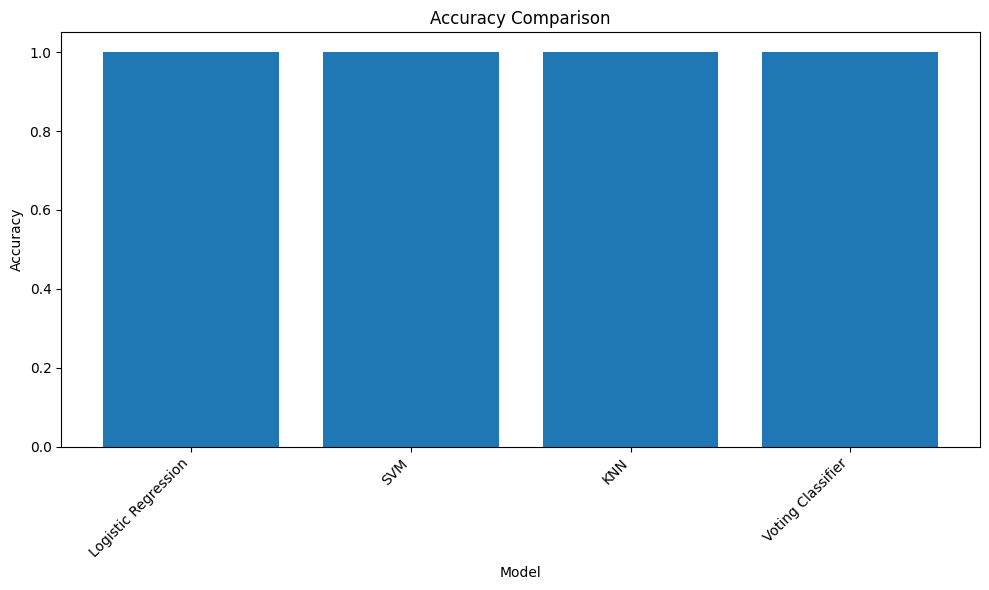

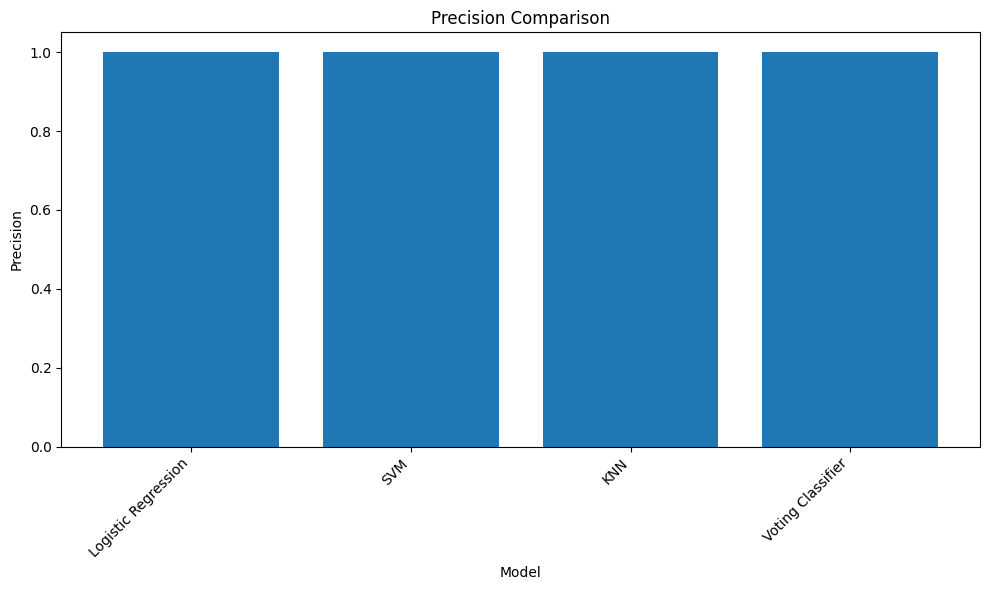

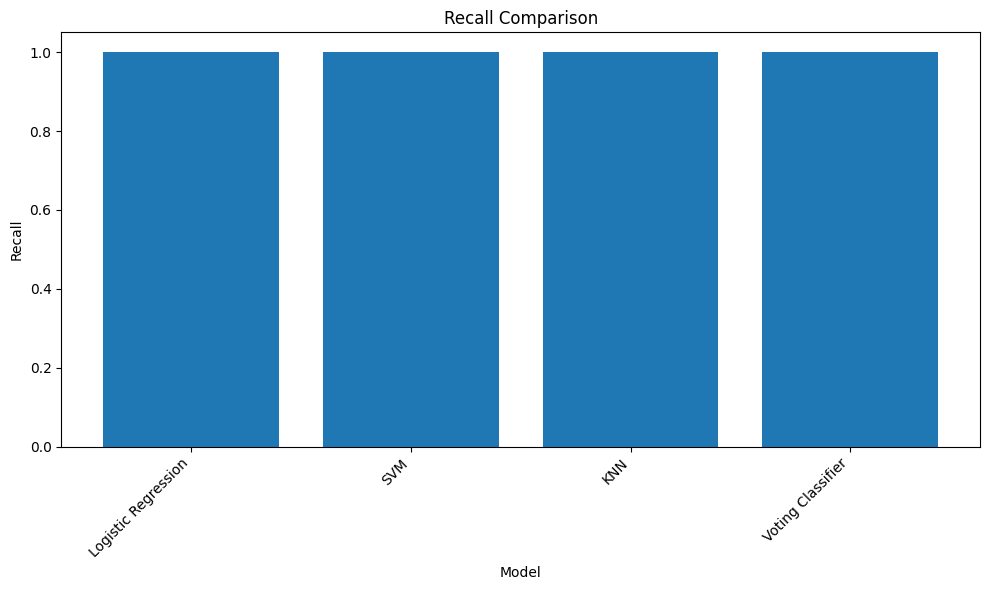

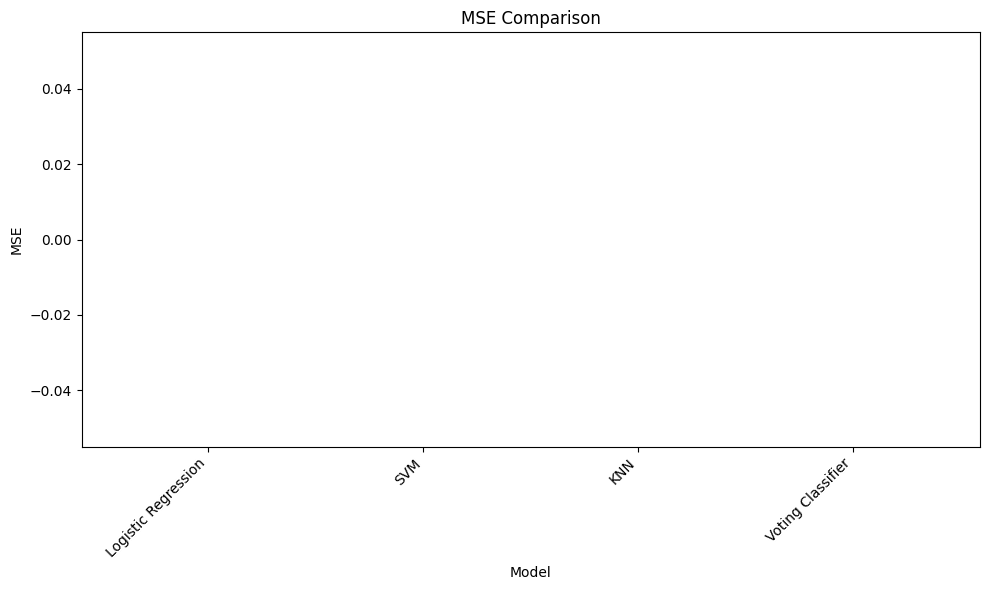

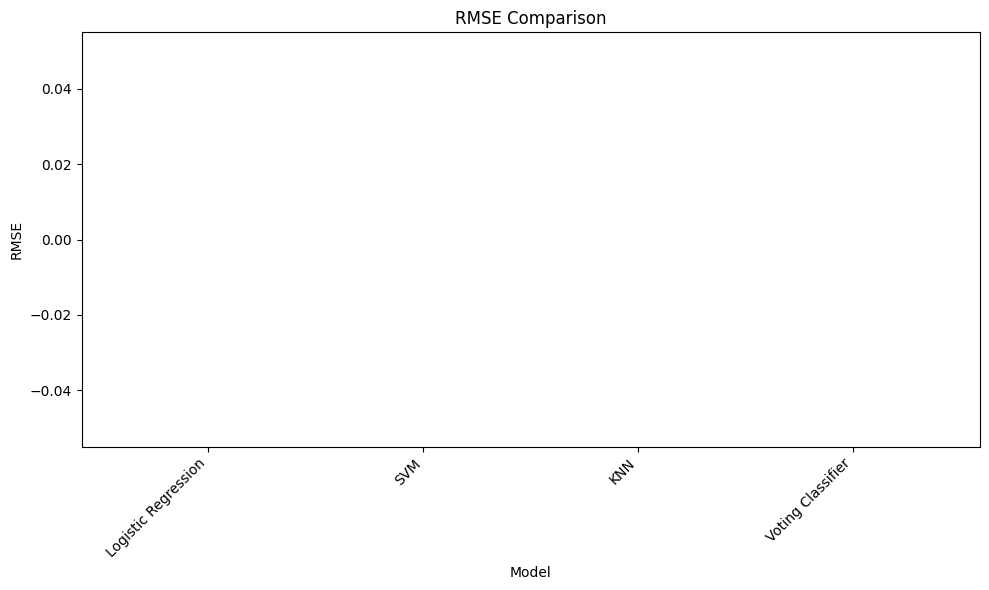

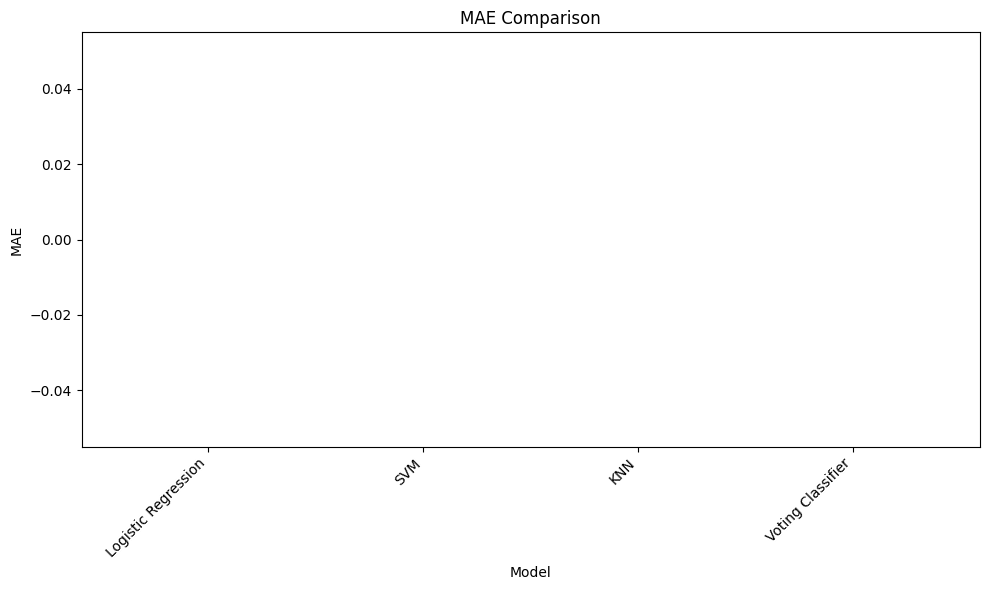

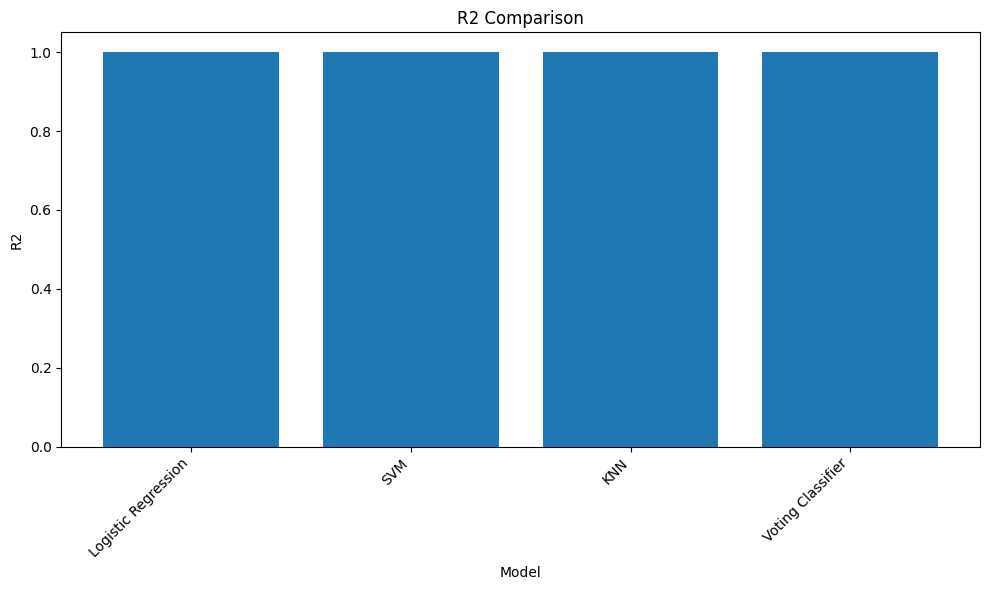

In [ ]:
# prompt: visualize output evaluation metrices of logreg, svm, knn  and voting classifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_logreg,
        'Precision': precision_score(y_test, y_pred_logreg),
        'Recall': recall_score(y_test, y_pred_logreg),
        'MSE': mean_squared_error(y_test, y_pred_logreg),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_logreg)),
        'MAE': mean_absolute_error(y_test, y_pred_logreg),
        'R2': r2_score(y_test, y_pred_logreg)
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Precision': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'MSE': mean_squared_error(y_test, y_pred_svm),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svm)),
        'MAE': mean_absolute_error(y_test, y_pred_svm),
        'R2': r2_score(y_test, y_pred_svm)
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Precision': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'MSE': mean_squared_error(y_test, y_pred_knn),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        'MAE': mean_absolute_error(y_test, y_pred_knn),
        'R2': r2_score(y_test, y_pred_knn)
    },
    'Voting Classifier': {
        'Accuracy': accuracy_voting,
        'Precision': precision_score(y_test, y_pred_voting),
        'Recall': recall_score(y_test, y_pred_voting),
        'MSE': mean_squared_error(y_test, y_pred_voting),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_voting)),
        'MAE': mean_absolute_error(y_test, y_pred_voting),
        'R2': r2_score(y_test, y_pred_voting)
    }
}


# Create a bar plot to visualize the metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'MSE', 'RMSE', 'MAE', 'R2']
for metric in metrics_to_plot:
  plt.figure(figsize=(10, 6))
  values = [model_metrics[model][metric] for model in model_metrics]
  plt.bar(model_metrics.keys(), values)
  plt.title(f'{metric} Comparison')
  plt.xlabel('Model')
  plt.ylabel(metric)
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  plt.show()

